In [1]:
#In this dataset, I dissected a large group of movies and searched for the factors that resulted in profitability (defined as
#Box Office Gross / Budget). Before creating linear regression models to try to predict profitability of new movies that would 
#be release, I analyzed the effect that different variables had on the overall profitability of movies. These variables include:

# Number of famous actors (defined from a mass polling site with > 1 million votes)
# Celebrity of famous directors (defined from a mass polling site with > 300k votes)
# Timing of movie release (e.g. Seasonality)
# Length of movie (runtime)

#Some interesting trends that became apparent right off the bat: 

# More movies appear to be unsuccessful than successful
    # Median profitability is 81 cents on the dollar -> movies_short['Profitability_Ratio'].median() = 0.809
# Famous actors are correlated with better odds of making a successful movie, though not a significant predictor [line 63]
# While movies in the fall post bigger revenues, movies in the summer are actually more profitable [line 50] 
# A greater proportion of shorter movies are unprofitable compared to longer ones [line 57]
# Size of budget and IMDB rating are the most significant predictors of profitability [line 125]





#Read on for the resulting visualizations and conclusions.



In [2]:
# The linear regression model was initially trained with these variables, as well as: 

# Genre of movie (represented as a series of dummy variables)
# Censorship rating of movie (represented as a series of dummy variables) 



# To make a post-release model of movies, I trained an additional model with the extra variables: 

# Rating on imdb ('imdb_rating')
# * Awards won ('Oscars')

In [3]:
#Import everything#
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


In [4]:
#Bring in the Movies#
movies = pd.read_csv("C:/Movies/Raw Movie Data.csv")
movies.head()

,imdbid,title,plot,rating,imdb_rating,metacritic,dvd_release,production,actors,imdb_votes,poster,director,release_date,runtime,genre,awards,keywords,Budget,Box Office Gross
0,tt0010323,The Cabinet of Dr. Caligari,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",UNRATED,8.1,NaN,15-Oct-97,Rialto Pictures,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","42,583",https://images-na.ssl-images-amazon.com/images...,Robert Wiene,19-Mar-21,67 min,"Fantasy, Horror, Mystery",1 nomination.,expressionism|somnambulist|avant-garde|hypnosi...,18000,NaN
1,tt0052893,Hiroshima Mon Amour,A French actress filming an anti-war film in H...,NOT RATED,8.0,NaN,24-Jun-03,Rialto Pictures,"Emmanuelle Riva, Eiji Okada, Stella Dassas, Pi...","21,154",https://images-na.ssl-images-amazon.com/images...,Alain Resnais,16-May-60,90 min,"Drama, Romance",Nominated for 1 Oscar. Another 6 wins & 5 nomi...,memory|atomic-bomb|lovers-separation|impossibl...,88300,NaN
2,tt0058898,Alphaville,A U.S. secret agent is sent to the distant spa...,NOT RATED,7.2,NaN,20-Oct-98,Rialto Pictures,"Eddie Constantine, Anna Karina, Akim Tamiroff","17,801",https://images-na.ssl-images-amazon.com/images...,Jean-Luc Godard,5-May-65,99 min,"Drama, Mystery, Sci-Fi",1 win.,dystopia|french-new-wave|satire|comic-violence...,220000,46585
3,tt0074252,"Ugly, Dirty and Bad",Four generations of a family live crowded toge...,NaN,7.9,NaN,1-Nov-16,Compagnia Cinematografica Champion,"Nino Manfredi, Maria Luisa Santella, Francesco...","5,705",https://images-na.ssl-images-amazon.com/images...,Ettore Scola,23-Sep-76,115 min,"Comedy, Drama",1 win & 2 nominations.,incest|failed-murder-attempt|poisoned-food|bap...,6590,NaN
4,tt0084269,Losing Ground,A comedy-drama about a Black American female p...,NaN,6.3,NaN,NaN,Milestone Film & Video,"Billie Allen, Gary Bolling, Clarence Branch Jr...",132,https://images-na.ssl-images-amazon.com/images...,Kathleen Collins,1-Jun-82,86 min,"Comedy, Drama",NaN,artist|painter|marriage|black-independent-film...,NaN,NaN


In [5]:
#Set Index
movies = movies.set_index('title')


In [6]:
#Drop Extra Columns
movies_short = movies.drop(['production', 'metacritic', 'dvd_release', 'imdbid', 'poster', 'keywords', 'imdb_votes'], axis=1)


In [7]:
#Drop rows without Money info, and drop "plot"
movies_short = movies_short[pd.notnull(movies_short['Box Office Gross'])]
movies_short = movies_short[pd.notnull(movies_short['Budget'])]
movies_short = movies_short.drop('plot', axis=1)


In [8]:
#Remove gunk from Box Office and Budget Columns
# 'fake' is just a placeholder because I couldn't figure out what to do for an empty "if:" section here
fake = 0
idx = 0 
for gross in movies_short['Box Office Gross'] : 
    
    if gross.isdigit() :
        fake += 1
    else :
        movies_short.iloc[idx, 9] = np.nan   
    idx += 1

In [9]:
idx = 0 
for movies in movies_short['Budget'] : 
    
    if gross.isdigit() :
        fake += 1
    else :
        movies_short.iloc[idx, 8] = np.nan   
    idx += 1
    
print(fake)

5253


In [10]:
#Make column for profitability Ratio and Define It


movies_short['Profitability Ratio'] = 0 

idx = 0 
for movies in movies_short['Profitability Ratio'] : 
    movies_short.iloc[idx, 10] = float(movies_short.iloc[idx, 9]) / float(movies_short.iloc[idx, 8])
   
    idx += 1

In [11]:
#Upload Famous Actors and Make a column

famous_actors = pd.read_csv("C:/Movies/Greatest Actors List.csv")
#df = df[np.isfinite(df['EPS'])]


In [12]:
movies_short['actor_score'] = 0

pos = -1
for actors in movies_short['actors'] :
    actors = str(actors).split(',')
    pos += 1
    
    for actor in actors :
        actor = actor.strip()
        
        if actor in famous_actors['Name'].tolist() :
           
            movies_short.iloc[pos, 11] += 1 
            

In [13]:
#Uploading and prepping the famous directors list

famous_directors = pd.read_csv("C:/Movies/Greatest Directors List.csv")

first_ten = famous_directors['Name'][0:10]
second_ten = famous_directors['Name'][11:20]
third_ten = famous_directors['Name'][21:30]
fourth_ten = famous_directors['Name'][31:40]
fifth_ten = famous_directors['Name'][41:50]

first_ten = first_ten.tolist()
second_ten = second_ten.tolist()
third_ten = third_ten.tolist()
fourth_ten = fourth_ten.tolist()
fifth_ten = fifth_ten.tolist()

In [14]:
movies_short['director_score'] = 0
        
pos = -1
for directors in movies_short['director'] :
    directors = str(directors)
    pos += 1
    
        
    if directors in first_ten :
           
        movies_short.iloc[pos, 12] += 5
    
    if directors in second_ten :
           
        movies_short.iloc[pos, 12] += 4
        
    if directors in third_ten :
           
        movies_short.iloc[pos, 12] += 3
        
    if directors in fourth_ten :
           
        movies_short.iloc[pos, 12] += 2
        
    if directors in fifth_ten :
           
        movies_short.iloc[pos, 12] += 1
        

In [15]:
#Make Genre Columns
movies_short['Action?'] = 0 
movies_short['Adventure?'] = 0
movies_short['Animation?'] = 0 
movies_short['Biography?'] = 0 
movies_short['Comedy?'] = 0 
movies_short['Drama?'] = 0 
movies_short['Family?'] = 0 
movies_short['Fantasy?'] = 0
movies_short['History?'] = 0 
movies_short['Horror?'] = 0 
movies_short['Mystery?'] = 0 
movies_short['Romance?'] = 0 
movies_short['Sci-Fi?'] = 0 
movies_short['Thriller?'] = 0 


In [16]:
#Assign Genre Column Values
pos = -1
for genres in movies_short['genre'] :
    genres = str(genres).split(',')
    pos += 1
    
    for genre in genres :
        if 'Action' in genre.strip() :
            movies_short.iloc[pos, 13] += 1
            
        if 'Adventure' in genre.strip():
            movies_short.iloc[pos, 14] += 1
            
        if 'Animation' in genre.strip():
            movies_short.iloc[pos, 15] += 1
            
        if 'Biography' in genre.strip():
            movies_short.iloc[pos, 16] += 1
            
        if 'Comedy' in genre.strip():
            movies_short.iloc[pos, 17] += 1
            
        if 'Drama' in genre.strip():
            movies_short.iloc[pos, 18] += 1
            
        if 'Family' in genre.strip():
            movies_short.iloc[pos, 19] += 1
            
        if 'Fantasy' in genre.strip() :
            movies_short.iloc[pos, 20] += 1
            
        if 'History' in genre.strip():
            movies_short.iloc[pos, 21] += 1
            
        if 'Horror' in genre.strip():
            movies_short.iloc[pos, 22] += 1
            
        if 'Mystery' in genre.strip():
            movies_short.iloc[pos, 23] += 1
            
        if 'Romance' in genre.strip():
            movies_short.iloc[pos, 24] += 1
            
        if 'Sci-Fi' in genre.strip():
            movies_short.iloc[pos, 25] += 1
            
        if 'Thriller' in genre.strip() :
            movies_short.iloc[pos, 26] += 1
            
        

In [17]:
#Make MPAA Rating Columns

movies_short['G?'] = 0 
movies_short['PG?'] = 0
movies_short['PG-13?'] = 0 
movies_short['R?'] = 0 
movies_short['Not Rated?'] = 0 



In [18]:
#Assign MPAA Rating Column Values
pos = 0
for ratings in movies_short['rating'] :
    ratings = str(ratings).strip()
    
    if ratings == 'G' :
        movies_short.iloc[pos, 27] += 1
        
    elif ratings == 'PG' :
        movies_short.iloc[pos, 28] += 1
        
    elif ratings == 'PG-13' :
        movies_short.iloc[pos, 29] += 1
        
    elif ratings == 'R' :
        movies_short.iloc[pos, 30] += 1
        
    else :
        movies_short.iloc[pos, 31] += 1
    
    pos += 1
    
    
    

In [19]:
#Fix Datetimes

from datetime import datetime
from dateutil.parser import parse
pos = 0
for cell in movies_short['release_date'] :
        #parse(str(cell))
    if type(cell) == str : 
        movies_short.iloc[pos, 4] = parse(cell)
    else : 
        movies_short.iloc[pos, 4] = np.nan
    pos += 1    
   
        


In [20]:
movies_short.head()
#type(movies_short.iloc[0, 4])

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,...,Horror?,Mystery?,Romance?,Sci-Fi?,Thriller?,G?,PG?,PG-13?,R?,Not Rated?
title,,,,,,,,,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,2065-05-05 00:00:00,99 min,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,...,0,1,0,1,0,0,0,0,0,1
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,1984-06-08 00:00:00,105 min,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,...,0,0,0,0,0,0,1,0,0,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",1991-11-22 00:00:00,84 min,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,...,0,0,0,0,0,1,0,0,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,1993-06-11 00:00:00,127 min,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,...,0,0,0,1,1,0,0,1,0,0
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,1994-07-06 00:00:00,142 min,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,...,0,0,1,0,0,0,0,1,0,0


In [21]:
print(np.mean(movies_short['Profitability Ratio']))
#There are some outliers here that need to be reviewed 

6.96075772307686


In [22]:
pos = 0
for ratio in movies_short['Profitability Ratio'] :
    if ratio >= 30 :
        movies_short.iloc[pos, 10] = np.nan
        print(pos)
    pos += 1
    

400
710
738
818
968
1036
1166
1180
1197
1201
1208
1214
1228
1245
1259
1594
2183
2232
2409


In [23]:
print(np.mean(movies_short['Profitability Ratio']))

1.538446768751931


In [24]:
#Fix Movies one by one
movies_short.iloc[400, 10] = 102
#The Devil Inside, 102mil/1mil 


print(movies_short[818:819])

               rating  imdb_rating  \
title                                
God's Not Dead     PG          4.9   

                                                           actors  \
title                                                               
God's Not Dead  Kevin Sorbo, Shane Harper, David A.R. White, D...   

                    director         release_date  runtime  genre awards  \
title                                                                      
God's Not Dead  Harold Cronk  2014-03-21 00:00:00  113 min  Drama    NaN   

                 Budget Box Office Gross     ...      Horror?  Mystery?  \
title                                        ...                          
God's Not Dead  2000000         60755732     ...            0         0   

                Romance?  Sci-Fi?  Thriller?  G?  PG?  PG-13?  R?  Not Rated?  
title                                                                          
God's Not Dead         0        0          0   0    1       0 

In [25]:
#Convert Box Office Column to Budget and Box Office Gross Columns, slipping through the 13 columns that are 

In [26]:
counter = 0
for index in np.arange(len(movies_short['Box Office Gross'])) : 
    if pd.isnull(movies_short.iloc[index, 9]) == True:
        counter += 1
    else : 
        movies_short.iloc[index, 9] = int(movies_short.iloc[index, 9])
        
print(type(movies_short.iloc[0,9]))  


<class 'int'>


In [27]:
for index in np.arange(len(movies_short['Budget'])) : 
    if pd.isnull(movies_short.iloc[index, 8]) == True:
        counter += 1
    else : 
        movies_short.iloc[index, 8] = int(movies_short.iloc[index, 8])

In [28]:
fake = 0 
count = 0
import re 
idx = 0 
for time in movies_short['runtime'] :
    #print(type(time))
    if type(time) == str : 
        new_time = re.findall('\d+', time)
        movies_short.iloc[idx, 5] = int(new_time[0])
    elif type(time) == int : 
        fake += 1 
    else : 
        movies_short.iloc[idx, 5] = 0 
        count += 1 
    idx += 1 
#print(type(movies_short.iloc[0, 5]))

movies_short.head()

,rating,imdb_rating,actors,director,release_date,runtime,genre,awards,Budget,Box Office Gross,...,Horror?,Mystery?,Romance?,Sci-Fi?,Thriller?,G?,PG?,PG-13?,R?,Not Rated?
title,,,,,,,,,,,,,,,,,,,,,
Alphaville,NOT RATED,7.2,"Eddie Constantine, Anna Karina, Akim Tamiroff",Jean-Luc Godard,2065-05-05 00:00:00,99,"Drama, Mystery, Sci-Fi",1 win.,220000,46585,...,0,1,0,1,0,0,0,0,0,1
Ghostbusters,PG,7.8,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",Ivan Reitman,1984-06-08 00:00:00,105,"Action, Adventure, Comedy",Nominated for 2 Oscars. Another 6 wins & 6 nom...,30000000,238632124,...,0,0,0,0,0,0,1,0,0,0
Beauty and the Beast,G,8.0,"Robby Benson, Jesse Corti, Rex Everhart, Angel...","Gary Trousdale, Kirk Wise",1991-11-22 00:00:00,84,"Animation, Family, Fantasy",Won 2 Oscars. Another 23 wins & 22 nominations.,25000000,218967620,...,0,0,0,0,0,1,0,0,0,0
Jurassic Park,PG-13,8.1,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...",Steven Spielberg,1993-06-11 00:00:00,127,"Adventure, Sci-Fi, Thriller",Won 3 Oscars. Another 28 wins & 17 nominations.,63000000,402453882,...,0,0,0,1,1,0,0,1,0,0
Forrest Gump,PG-13,8.8,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,1994-07-06 00:00:00,142,"Comedy, Drama, Romance",Won 6 Oscars. Another 39 wins & 66 nominations.,55000000,330252182,...,0,0,1,0,0,0,0,1,0,0


In [29]:
#There were some values for budget greater than 10,000,000,000 - which I highly suspect of being a currency error or mistake after 
#looking at the original dataset. Let's observe what these may be. 
idx = 0 
for lines in movies_short['Budget'] :
    if lines>= 900000000 : 
        print(lines) 
    #print(lines)
    idx += 1

1270000000
1800000000
1250000000
10000000000
1250000000
10000000000
1550000000
1150000000
1300000000
30000000000


In [30]:
#Strip letters from string to plot runtimes 
#Okay so this was much more complicated than initially anticipated but my overall strategy here is to 
#Filter through a regular expression, which leaves me with an array ['XX'] which then is stripped down
#to just its number.

#The variable fake is just used as a placeholder, because I didn't want existing integers to be
#affected as I played around with this loop. If the notebook is run through only once this shouldn't 
#be an issue. 
#The variable count was to see how many exceptions I had 'erased' (replaced with 0) in the runtime slot 

In [31]:
#print(movies_short[movies_short['Budget'] == 1270000000])
print(movies_short[movies_short['Budget'] == 1800000000])
#print(movies_short[movies_short['Budget'] == 1250000000])
#print(movies_short[movies_short['Budget'] == 10000000000])
#print(movies_short[movies_short['Budget'] == 1150000000])
#print(movies_short[movies_short['Budget'] == 1300000000])
#print(movies_short[movies_short['Budget'] == 30000000000])


#Extremes: 
#1) Half of a Yellow Sun
#2) Prem Ratan Dhan Payo
#3) Bajirao Mastani 
#4) The Handmaiden 
#5) Dilwale
#6) Train to Busan
#7) Krrish 3
#8) Poetry
#9) My Way

                     rating  imdb_rating  \
title                                      
Prem Ratan Dhan Payo    NaN          4.8   

                                                                 actors  \
title                                                                     
Prem Ratan Dhan Payo  Salman Khan, Sonam Kapoor, Neil Nitin Mukesh, ...   

                                director         release_date runtime  \
title                                                                   
Prem Ratan Dhan Payo  Sooraj R. Barjatya  2015-11-12 00:00:00     164   

                                       genre   awards      Budget  \
title                                                               
Prem Ratan Dhan Payo  Action, Drama, Musical  2 wins.  1800000000   

                     Box Office Gross     ...      Horror?  Mystery?  \
title                                     ...                          
Prem Ratan Dhan Payo          4364639     ...            0         0 

In [32]:
#somehow delete all of these 9 rows

movies_short = movies_short.drop(['Half of a Yellow Sun', 'Prem Ratan Dhan Payo', 'Bajirao Mastani', 'The Handmaiden', 'Dilwale', 'Train to Busan', 'Krrish 3', 'Poetry', 'My Way'])


In [33]:
#Exploratory Hist plots to document spread across the budget and the revenues.

C:\Users\Brook\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Brook\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


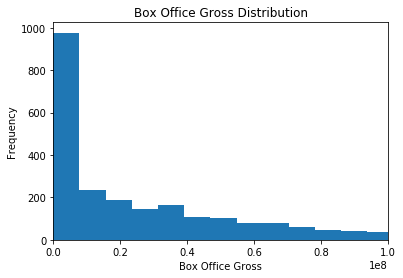

In [34]:
plt.hist(movies_short['Box Office Gross'], bins='auto')
plt.title('Box Office Gross Distribution')
plt.xlabel('Box Office Gross')
plt.ylabel('Frequency')
plt.xlim(0, 100000000)
plt.show()

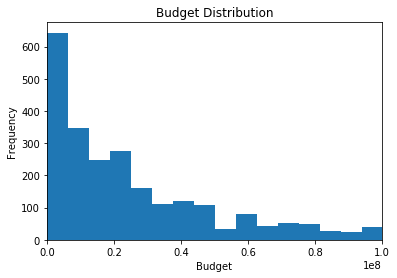

In [35]:
plt.hist(movies_short['Budget'], bins='auto')
plt.xlim(0, 100000000)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Budget Distribution')
plt.show()

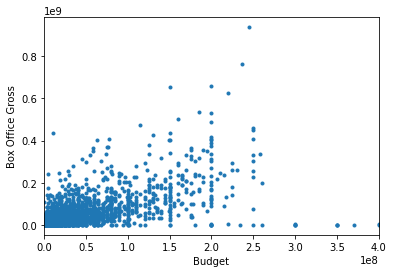

In [36]:
#Scatter Plot to examine relationship between budget and gross
plt.plot(movies_short['Budget'], movies_short['Box Office Gross'], linestyle='None', marker='.')
plt.xlim(0, 400000000)
plt.xlabel('Budget')
plt.ylabel('Box Office Gross')
plt.show()

#Will cap the budget and box office grosses for the purpose of regression.

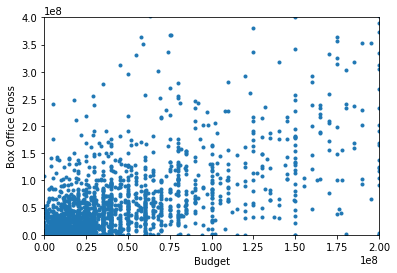

In [37]:
#Zoom In 
plt.plot(movies_short['Budget'], movies_short['Box Office Gross'], linestyle='None', marker='.')
plt.ylim(0, 400000000)
plt.xlim(0, 200000000)
plt.xlabel('Budget')
plt.ylabel('Box Office Gross')
plt.show()

#np.corrcoef(movies_short['Budget'], movies_short['Box Office Gross'])

In [38]:
movies_splice = movies_short[['Budget', 'Box Office Gross']]


pearson = movies_splice['Budget'].astype(float).corr(movies_splice['Box Office Gross'].astype(float))


print(pearson)

0.400634309947


In [39]:
#As Expected, it looks like there is some relationship between budget and box office gross, but it hard to tell from points alone
#How prolific this relationship is. 

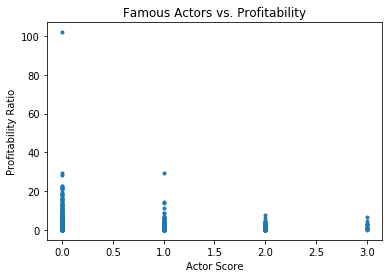

In [40]:
#Exploratory Plots

#Actor Score
plt.plot(movies_short['actor_score'], movies_short['Profitability Ratio'], linestyle='None', marker='.')
plt.xlabel('Actor Score')
plt.ylabel('Profitability Ratio')
plt.title('Famous Actors vs. Profitability')
plt.show()

#The number of famous actors shrinks the range of profitabilities, which makes sense considering that movies with more famous actors 
#tend to have larger budgets.


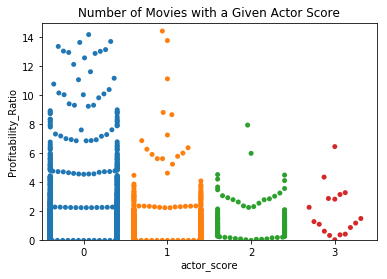

In [130]:
#Swarmplot of the same information to visualize, but needs further examination.
#WARNING: Takes a while to load!

sns.swarmplot(x=movies_short['actor_score'], y=movies_short['Profitability Ratio'])
plt.title('Number of Movies with a Given Actor Score')
plt.ylim((0, 15))
plt.show()

In [42]:
#Maybe for box plots or 4 vertical histograms

#USe kernels to modify histogram plotting

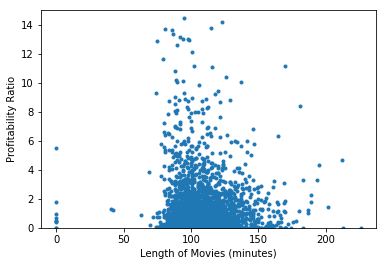

In [43]:
#Runtime 
###############################################

plt.plot(movies_short['runtime'], movies_short['Profitability Ratio'], linestyle='None', marker='.')
plt.ylim((0, 15))
plt.xlabel('Length of Movies (minutes)')
plt.ylabel('Profitability Ratio')
plt.show()

In [125]:
movies_short['runtime'].median()
movies_short['runtime'].mean()

107.3014481707317

In [44]:
#Based on initial analysis, it looks like the median movie is not profitable, but that there are some definite trends in the
#movies that tend to make it big. The variables to watch out for in the predictive model include actor and director score,
#runtime, and genre. 

In [45]:
#Let's analyze different time blocks to see if they have any influence on revenue.

In [46]:
winter = movies_short[(movies_short['release_date'].dt.month >= 1) & (movies_short['release_date'].dt.month <= 3)]
spring = movies_short[(movies_short['release_date'].dt.month >= 4) & (movies_short['release_date'].dt.month <= 6)]
summer = movies_short[(movies_short['release_date'].dt.month >= 7) & (movies_short['release_date'].dt.month <= 9)]
fall = movies_short[(movies_short['release_date'].dt.month >= 10) & (movies_short['release_date'].dt.month <= 12)]

In [47]:
winter_med = np.median(winter['Box Office Gross'])
spring_med = np.median(spring['Box Office Gross'])
summer_med = np.median(summer['Box Office Gross'])
fall_med = np.median(fall['Box Office Gross'])

averages = [winter_med, spring_med, summer_med, fall_med]
x = ['Winter', 'Spring', 'Summer', 'Fall']

[19522939.0, 17384072.0, 18872522.0, 19985196.0]


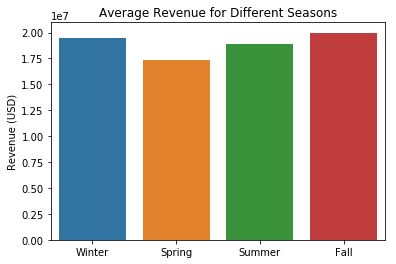

In [48]:
print(averages)
sns.barplot(x=x, y=averages)
plt.ylabel('Revenue (USD)')
plt.title('Average Revenue for Different Seasons')
plt.show()

#According to this, the median movie has the greatest revenue in the fall and least in the spring!

In [49]:
winter_med = np.nanmedian(winter[pd.notnull(winter)]['Profitability Ratio'])
spring_med = np.nanmedian(spring[pd.notnull(spring)]['Profitability Ratio'])
summer_med = np.nanmedian(summer[pd.notnull(summer)]['Profitability Ratio'])
fall_med = np.nanmedian(fall[pd.notnull(fall)]['Profitability Ratio'])

medians = [winter_med, spring_med, summer_med, fall_med]
x = ['Winter', 'Spring', 'Summer', 'Fall']


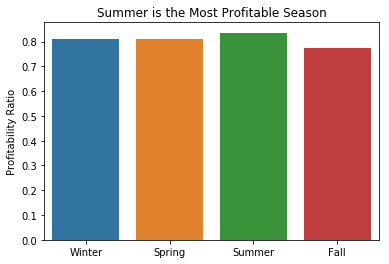

[0.8091221428571429, 0.81189596428571431, 0.83596948148148154, 0.77236336576923081]


In [50]:
sns.barplot(x=x, y=medians)
plt.ylabel('Profitability Ratio')
plt.title('Summer is the Most Profitable Season')
plt.show()
print(medians)

#Interestingly, even though revenue is up in the fall, profitability actually peaks in the summer.

In [51]:
winter_trim = winter[pd.notnull(winter)]['Profitability Ratio']
spring_trim = spring[pd.notnull(spring)]['Profitability Ratio']
summer_trim = summer[pd.notnull(summer)]['Profitability Ratio']
fall_trim = fall[pd.notnull(fall)]['Profitability Ratio']

In [52]:
import scipy.stats as stats

stats.f_oneway(winter_trim, spring_trim, summer_trim, fall_trim)

F_onewayResult(statistic=nan, pvalue=nan)

In [53]:
#Runtime Analysis 

#Only taking out profitable movies, then plotting the general distribution of profitable movies across runtimes.
profitable_movies = movies_short[movies_short['Profitability Ratio'] >= 1]
#profitable_movies.head()

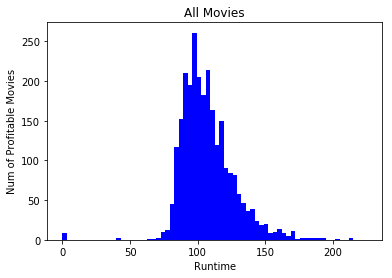

In [55]:
plt.hist(movies_short['runtime'], bins='auto', range = (0,225), color='b')
plt.xlabel('Runtime')
plt.ylabel('Num of Profitable Movies')
plt.title('All Movies')
plt.show()

#Right from the graph, it appears that the overall set of movies has a larger proportion of movies that run longer than 120 mins
#and a slight 

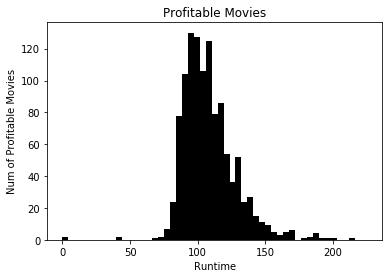

In [54]:
plt.hist(profitable_movies['runtime'], bins='auto', range =(0, 225), color='k')
plt.xlabel('Runtime')
plt.ylabel('Num of Profitable Movies')
plt.title('Profitable Movies')
plt.show()



#It looks like movies around 100 min. long, with a slight bias towards the shorter, tend to fare the best. Let's compare to 
#the original set. 

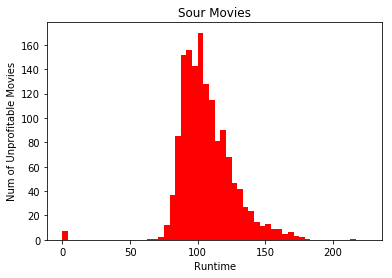

In [56]:
#Let's see the distribution for unprofitable movies. 

unprofitable_movies = movies_short[movies_short['Profitability Ratio'] <= 1]

plt.hist(unprofitable_movies['runtime'], bins='auto', range = (0,225), color='r')
plt.xlabel('Runtime')
plt.ylabel('Num of Unprofitable Movies')
plt.title('Sour Movies')
plt.show()

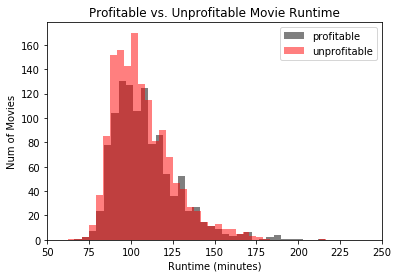

In [128]:
#Putting the two distributions together 

plt.hist(profitable_movies['runtime'], bins='auto', alpha= 0.5, range =(0, 225), color='k', label='profitable')
plt.hist(unprofitable_movies['runtime'], bins='auto', alpha= 0.5, range = (0,225), color='r', label='unprofitable')

plt.xlabel('Runtime (minutes)')
plt.ylabel('Num of Movies')
plt.title('Profitable vs. Unprofitable Movie Runtime')
plt.xlim(50, 250)
plt.legend(loc='upper right')
plt.show()

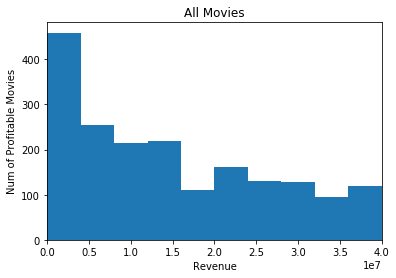

In [58]:
plt.hist(movies_short['Budget'], bins=10, range = (0, 40000000))
plt.xlabel('Revenue')
plt.ylabel('Num of Profitable Movies')
plt.title('All Movies')
plt.xlim(0, 40000000)
plt.show()

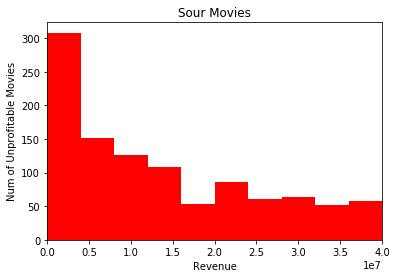

In [59]:
plt.hist(unprofitable_movies['Budget'], bins=10, range = (0, 40000000), color='r')
plt.xlabel('Revenue')
plt.ylabel('Num of Unprofitable Movies')
plt.title('Sour Movies')
plt.xlim(0, 40000000)
plt.show()

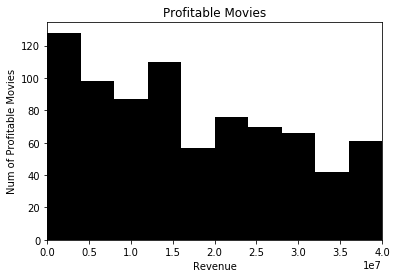

In [60]:
plt.hist(profitable_movies['Budget'], bins=10, range = (0, 40000000), color='k')
plt.xlabel('Revenue')
plt.ylabel('Num of Profitable Movies')
plt.title('Profitable Movies')
plt.xlim(0, 40000000)
plt.show()

#Based on these plots alone, which can only be compared on a relative scale, it appears that the proportion of big budget movies
#in the profitable section is higher than that without. Further analysis may reveal whether big budget movies tend to outperform
#smaller ones.

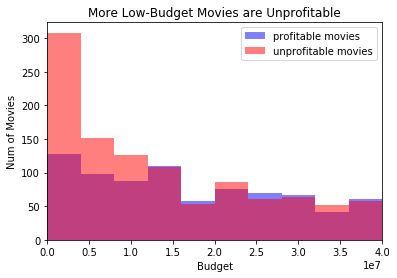

In [126]:
plt.hist(profitable_movies['Budget'], bins=10, range = (0, 40000000), alpha=0.5, color='b', label='profitable movies')
plt.hist(unprofitable_movies['Budget'], bins=10, range = (0, 40000000), alpha=0.5, color='r', label='unprofitable movies')

plt.xlabel('Budget')
plt.ylabel('Num of Movies')
plt.title('More Low-Budget Movies are Unprofitable')
plt.legend(loc='upper right')
plt.xlim(0, 40000000)
plt.show()

#The large salmon-pink area on the left side of the graph suggests that a greater proportion of 
# movies that are unprofitable are low-budget. Cause and effect are yet to be determined, however.

In [62]:
#Comparing the proportion of movies above a benchmark time - say, 2 hours - for the different batches of movies.

long_prof_movies_count = profitable_movies[profitable_movies['runtime'] >= 120]['runtime'].count()
prof_movies_count = profitable_movies['runtime'].count()

long_movies_count = movies_short[movies_short['runtime'] >= 120]['runtime'].count()
movies_count = movies_short['runtime'].count()

long_unprof_movies_count = unprofitable_movies[unprofitable_movies['runtime'] >= 120]['runtime'].count()
unprof_movies_count = unprofitable_movies['runtime'].count()

print(long_prof_movies_count / prof_movies_count * 100)
print(long_movies_count / movies_count * 100)
print(long_unprof_movies_count / unprof_movies_count * 100)


#There's a noticeable, albeit slight trend here! Out of the total set of movies, only 19.9% of successful ones ran longer than 2
# hours, compared to 21.4% of unsuccessful ones. Nearly half of movies in general! Perhaps people are impatient and don't 
# want to lose a great deal of time on entertainment. #Perhaps going long is a slightly risky decision by producers. We'll have 
#to test if this difference is significant.


22.8116710875
21.7987804878
21.0382513661


0.809122142857
0.72688614
0.989852544828
1.11280369333
1.29664436


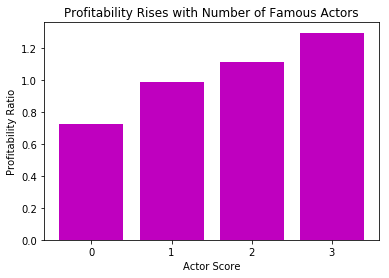

In [63]:
#comparing actor score 0 with actor score 1 
#Right off the bat it's apparent that going from an actor score of 0 to anything else is much better, with even one famous actor
#causing an expected return of nearly 100% of budget back

median_profitability = np.median(movies_short['Profitability Ratio'].dropna())
actor_0 = movies_short[movies_short['actor_score'] == 0]
actor_1 = movies_short[movies_short['actor_score'] == 1]
actor_2 = movies_short[movies_short['actor_score'] == 2]
actor_3 = movies_short[movies_short['actor_score'] == 3]

print(median_profitability)
print(np.median(actor_0['Profitability Ratio'].dropna()))
print(np.median(actor_1['Profitability Ratio'].dropna()))
print(np.median(actor_2['Profitability Ratio'].dropna()))
print(np.median(actor_3['Profitability Ratio'].dropna()))

medians = []
medians.append(np.median(actor_0['Profitability Ratio'].dropna()))
medians.append(np.median(actor_1['Profitability Ratio'].dropna()))
medians.append(np.median(actor_2['Profitability Ratio'].dropna()))
medians.append(np.median(actor_3['Profitability Ratio'].dropna()))

labels = ('0', '1', '2', '3')

y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels)

plt.bar(y_pos, medians, color='m')
plt.xlabel('Actor Score')
plt.ylabel('Profitability Ratio')
plt.title('Profitability Rises with Number of Famous Actors')
plt.show()

In [64]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [65]:
movies_short['runtime'] = pd.to_numeric(movies_short['runtime'])

In [66]:
movies_short['Budget'] = pd.to_numeric(movies_short['Budget'])

In [67]:
movies_short.dtypes

rating                  object
imdb_rating            float64
actors                  object
director                object
release_date            object
runtime                  int64
genre                   object
awards                  object
Budget                   int64
Box Office Gross        object
Profitability Ratio    float64
actor_score              int64
director_score           int64
Action?                  int64
Adventure?               int64
Animation?               int64
Biography?               int64
Comedy?                  int64
Drama?                   int64
Family?                  int64
Fantasy?                 int64
History?                 int64
Horror?                  int64
Mystery?                 int64
Romance?                 int64
Sci-Fi?                  int64
Thriller?                int64
G?                       int64
PG?                      int64
PG-13?                   int64
R?                       int64
Not Rated?               int64
dtype: o

In [68]:
empirical_diff_means = diff_of_means(actor_0['Profitability Ratio'], actor_1['Profitability Ratio'])

In [69]:
#type(actor_0.iloc[0, 10])
#type(np.median(actor_0))

In [70]:
#Time for T-test 

actors_shifted_0 = actor_0['Profitability Ratio'].dropna() - np.median(actor_0['Profitability Ratio'].dropna()) + median_profitability
actors_shifted_0 = actor_1['Profitability Ratio'].dropna() - np.median(actor_1['Profitability Ratio'].dropna()) + median_profitability

bs_replicates_0 = draw_bs_reps(actors_shifted_0, np.median, size=10000)
bs_replicates_1 = draw_bs_reps(actors_shifted_0, np.median, size=10000) 

bs_replicates = bs_replicates_0 - bs_replicates_1 
p = np.sum(bs_replicates > empirical_diff_means) / 10000
print('p-value =', p)

#P-value of 0.0135 suggests that even the difference between a single and no famous actors is signficant!

p-value = 0.0147


In [71]:
winter['Profitability Ratio']


title
Gnomeo & Juliet                                        2.776880
The Lovely Bones                                       0.674136
John Carter                                            0.292312
Youth in Revolt                                        0.848960
Daybreakers                                            1.505079
The Crazies                                            1.956179
The Mechanic                                           0.728037
Hail, Caesar!                                          1.367283
Extremely Loud & Incredibly Close                      0.796197
Season of the Witch                                    0.620681
Hall Pass                                              1.251687
The Croods                                             1.386433
Red Tails                                              0.859938
Silence                                                0.153895
A Thousand Words                                       0.460954
Escape from Planet Earth          

In [72]:
winter_med = np.nanmedian(winter[pd.notnull(winter)]['Profitability Ratio'])
summer_med = np.nanmedian(summer[pd.notnull(summer)]['Profitability Ratio'])


winter_shifted = winter['Profitability Ratio'] - winter_med + median_profitability
summer_shifted = summer['Profitability Ratio'] - summer_med + median_profitability

empirical_diff_means = diff_of_means(winter['Profitability Ratio'], summer['Profitability Ratio'])

bs_replicates_0 = draw_bs_reps(actors_shifted_0, np.median, size=10000)
bs_replicates_1 = draw_bs_reps(actors_shifted_0, np.median, size=10000) 

bs_replicates = bs_replicates_0 - bs_replicates_1 
p = np.sum(bs_replicates > empirical_diff_means) / 10000
print('p-value =', p)

#P-value of 0.1732 suggests that there may be a signficant difference between summer and winter movies, though there is a one
#in 6 chance this difference is only made up by chance.

p-value = 0.1777


In [73]:
#Break down by genre and calculate types

horror_count = 0 
idx = -1
for idx in movies_short['Horror?'] : 
    
    if movies_short.iloc[idx, 22] > 0 :
        horror_count += 1 
        
    idx += 1 
    
print(horror_count)

0


In [74]:
#starts at 13, goes to 25
#2624 is the length of the movies set 

num = 13 


genre_counts = []
while num <= 26: 
    genre_counts.append(movies_short.iloc[:, num].sum()/2624)
    num += 1 
    
print(genre_counts)


"""
Getting closer to the solution here- but why are the numbers and counts here like this? They are way higher than they should be. 
Need to analyze and dig deeper into individual count.
Are things staying summated? Are the numbers not starting from 0?
"""

[0.24009146341463414, 0.18521341463414634, 0.054115853658536585, 0.06783536585365854, 0.3696646341463415, 0.5057164634146342, 0.06440548780487805, 0.07660060975609756, 0.028201219512195123, 0.09336890243902439, 0.08117378048780488, 0.17263719512195122, 0.06974085365853659, 0.16234756097560976]


'\nGetting closer to the solution here- but why are the numbers and counts here like this? They are way higher than they should be. \nNeed to analyze and dig deeper into individual count.\nAre things staying summated? Are the numbers not starting from 0?\n'

In [75]:
genres = list(movies_short.columns.values[13:27])
print(genres)

['Action?', 'Adventure?', 'Animation?', 'Biography?', 'Comedy?', 'Drama?', 'Family?', 'Fantasy?', 'History?', 'Horror?', 'Mystery?', 'Romance?', 'Sci-Fi?', 'Thriller?']


In [76]:
#Making a dictionary for the proportion of movies that are genre.

genre_dict = {}
idx = 0 
for val in genres: 
    genre_dict[val] = genre_counts[idx]
    idx += 1 
    
print(genre_dict)

{'Action?': 0.24009146341463414, 'Adventure?': 0.18521341463414634, 'Animation?': 0.054115853658536585, 'Biography?': 0.06783536585365854, 'Comedy?': 0.3696646341463415, 'Drama?': 0.5057164634146342, 'Family?': 0.06440548780487805, 'Fantasy?': 0.07660060975609756, 'History?': 0.028201219512195123, 'Horror?': 0.09336890243902439, 'Mystery?': 0.08117378048780488, 'Romance?': 0.17263719512195122, 'Sci-Fi?': 0.06974085365853659, 'Thriller?': 0.16234756097560976}


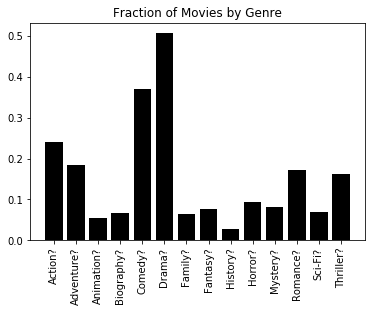

In [77]:

x_name = list(genre_dict.keys())
x = np.arange(len(x_name))  

plt.xticks(x, x_name) 
plt.xticks(rotation='vertical')
plt.title('Fraction of Movies by Genre')

plt.bar(x, genre_counts, align='center', color='k')
plt.show()


In [78]:
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [79]:
num = 13 


prof_genre_counts = []
while num <= 26: 
    prof_genre_counts.append(profitable_movies.iloc[:, num].sum()/genre_counts[num - 13])
    num += 1 
    
print(prof_genre_counts)

[999.6190476190477, 1247.20987654321, 1459.8309859154929, 1076.1348314606741, 1274.1278350515463, 980.7867370007535, 1304.2366863905324, 1070.4875621890546, 1063.7837837837837, 1424.4571428571428, 1231.924882629108, 1187.4613686534217, 1304.8306010928961, 1102.5727699530516]


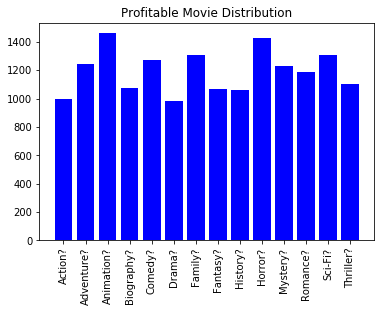

In [80]:
x_name = list(genre_dict.keys())
x = np.arange(len(x_name))  


plt.xticks(x, x_name) 
plt.xticks(rotation='vertical')
plt.title('Profitable Movie Distribution')

plt.bar(x, prof_genre_counts, align='center', color='b')
plt.show()

#So it's apparent that while family movies make up the most common genre, less common ones like Biography and Mystery tend to 
#outperform them. This may be something to observe further.

In [81]:
movies_short.rename(columns = {'Profitability Ratio':'Profitability_Ratio'}, inplace = True)

In [82]:
#Realized I have to rename all the columns with question marks because the ols function won't recognize them
movies_short.rename(columns = {'Adventure?':'Adventure'}, inplace = True)

In [83]:
movies_short.rename(columns = {'Animation?':'Animation', 'Biography?':'Biography', 'Comedy?':'Comedy', 'Drama?':'Drama', 'Family?':'Family', 'Fantasy?':'Fantasy', 'History?':'History', 'Horror?':'Horror', 'Mystery?':'Mystery', 'Romance?':'Romance', 'Sci-Fi?':'SciFi', 'Thriller?':'Thriller'}, inplace = True)

In [84]:
#Then the Censorship Ratings
movies_short.rename(columns = {'G?':'G', 'PG?':'PG', 'PG-13?':'PG13', 'R?':'R', 'Not Rated?':'NotRated'}, inplace = True)

In [85]:
movies_clean = movies_short.dropna()


In [86]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\Brook\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [87]:
subbos = movies_clean.loc[:, ('actor_score', 'director_score', 'Profitability_Ratio', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'G', 'PG', 'PG13', 'R', 'NotRated')]
subbos.head(20)

,actor_score,director_score,Profitability_Ratio,Adventure,Animation,Biography,Comedy,Drama,Family,Fantasy,...,Horror,Mystery,Romance,SciFi,Thriller,G,PG,PG13,R,NotRated
title,,,,,,,,,,,,,,,,,,,,,
Alphaville,0,0,0.211750,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
Ghostbusters,2,0,7.954404,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Beauty and the Beast,0,0,8.758705,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
Jurassic Park,0,3,6.388157,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
Forrest Gump,2,1,6.004585,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
Titanic,3,1,3.293362,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
Star Wars: Episode I - The Phantom Menace,2,1,4.126475,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
The Fast and the Furious,0,0,3.803524,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
The Secret Life of Walter Mitty,0,0,0.647076,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
m = ols('Profitability_Ratio ~ actor_score + director_score + Adventure + Animation + Biography + Comedy + Drama + Family + Fantasy + History + Horror + Mystery + Romance + SciFi + Thriller + G + PG + PG13 + R + NotRated', subbos).fit()
print(m.summary())

                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.040
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     4.428
Date:                 Mon, 16 Apr 2018   Prob (F-statistic):           6.14e-10
Time:                         19:36:05   Log-Likelihood:                -5486.1
No. Observations:                 2063   AIC:                         1.101e+04
Df Residuals:                     2043   BIC:                         1.112e+04
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.9879      0.2

In [89]:
#Next Steps: Find DataCamp lesson on standardizing/normalizing the variables to be on the same scale
#2: Standardize Variables (runtime, budget, actor and director score)
#3: Take Standardized Variables and Make better model (optional: add seasons back in as a dummy var.)
#4: Remove variables 

In [90]:
#Maximum Model, using all available variables before any trimming. 
# F-statistic of 2.064, with a Prob of 3x10^-23. Pretty good, but can it be improved by taking out 'junk' features?

subbos = movies_clean.loc[:, ('actor_score', 'director_score', 'Budget', 'runtime', 'Profitability_Ratio', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'G', 'PG', 'PG13', 'R', 'NotRated')]
subbos.head(20)

m = ols('Profitability_Ratio ~ actor_score + director_score + Budget + runtime + Adventure + Animation + Biography + Comedy + Drama + Family + Fantasy + History + Horror + Mystery + Romance + SciFi + Thriller + G + PG + PG13 + R + NotRated', subbos).fit()
print(m.summary())

                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.046
Model:                             OLS   Adj. R-squared:                  0.036
Method:                  Least Squares   F-statistic:                     4.714
Date:                 Mon, 16 Apr 2018   Prob (F-statistic):           9.29e-12
Time:                         19:36:05   Log-Likelihood:                -5478.8
No. Observations:                 2063   AIC:                         1.100e+04
Df Residuals:                     2041   BIC:                         1.113e+04
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6468      0.4

In [91]:
# It looks like the Censorship ratings, e.g. G, PG, PG-13, don't seem to matter in profitability at all, considering their .962
# p-value. Removing them 

m = ols('Profitability_Ratio ~ actor_score + director_score + Budget + runtime + Adventure + Animation + Biography + Comedy + Drama + Family + Fantasy + History + Horror + Mystery + Romance + SciFi + Thriller', subbos).fit()
print(m.summary())

###
#1. m.predict
#2. score with scikit (validation set) 
#3. score with test set and walk away

                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.041
Model:                             OLS   Adj. R-squared:                  0.033
Method:                  Least Squares   F-statistic:                     5.116
Date:                 Mon, 16 Apr 2018   Prob (F-statistic):           4.00e-11
Time:                         19:36:05   Log-Likelihood:                -5484.7
No. Observations:                 2063   AIC:                         1.101e+04
Df Residuals:                     2045   BIC:                         1.111e+04
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8438      0.5

In [92]:
predictors = movies_clean.loc[:, ('actor_score', 'director_score', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'G', 'PG', 'PG13', 'R', 'NotRated')]


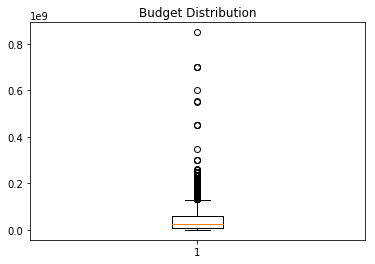

In [93]:
plt.boxplot(movies_clean['Budget'])
plt.title('Budget Distribution')
plt.show()

In [94]:
movies_clean['Budget'].describe()
#Any budget greater than $58,000,000 will get capped off there. 
#Any budget less than $1,000,000 will get capped off there. 

count    2.063000e+03
mean     4.506015e+07
std      6.348249e+07
min      3.000000e+03
25%      1.000000e+07
50%      2.500000e+07
75%      5.800000e+07
max      8.500000e+08
Name: Budget, dtype: float64

In [134]:
p = np.percentile(movies_clean['Budget'], 5)
print(p)
p = np.percentile(movies_clean['Budget'], 95)
print(p)

1100000.0
160000000.0


In [95]:
movies_clean['Budget_adjusted'] = 0

C:\Users\Brook\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
movies_clean.iloc[0, 32] = 1000



C:\Users\Brook\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [97]:
#Warning: Takes a LONG time!

idx = 0 
    
for budgets in movies_clean['Budget_adjusted'] :
    if movies_clean.iloc[idx, 8] <= 1000000 :
        movies_clean.iloc[idx, 32] = 1000000
    elif movies_clean.iloc[idx, 8] >= 58000000 : 
        movies_clean.iloc[idx, 32] = 58000000 
    else :
        movies_clean.iloc[idx, 32] = int(movies_clean.iloc[idx, 8])
    idx += 1 

C:\Users\Brook\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [98]:
"""
For Playing with Release Dates. Takes a long time.

"""

idx = 0 

movies_clean['age'] = 53
for dates in movies_clean['release_date'] :
    if idx < 1 :
        movies_clean.iloc[0, 33] = 53
    else: 
        movies_clean.iloc[idx, 33] = (2018 - movies_clean.iloc[idx, 4].year)
    idx += 1 


C:\Users\Brook\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Brook\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [99]:
"""
Doing it OLS style. There will be two models, a "pre-movie" model containing all variables except release_date/age and IMDB rating,
and a "released movie" model containing everything. 
"""

#Cutting up the dataset into train/validate/test splits
movies_train = movies_clean[:1200]
movies_validation = movies_clean[1201:1600]
movies_test = movies_clean[1601:]


In [100]:
subbos = movies_train.loc[:, ('actor_score', 'director_score', 'Budget_adjusted', 'runtime', 'Profitability_Ratio', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'G', 'PG', 'PG13', 'R', 'NotRated')]



In [102]:
m = ols('Profitability_Ratio ~ actor_score + director_score + Budget_adjusted + runtime + Adventure + Animation + Biography + Comedy + Drama + Family + Fantasy + History + Horror + Mystery + Romance + SciFi + Thriller + G + PG + PG13 + R + NotRated', subbos).fit()
print(m.summary())

import sklearn.metrics
preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

#Our initial Mean Squared Error (MSE) is an indicator of how accurate our resuilts are. The higher the MSe,
#The higher the discrepancy between our predicted results and the real measures. As we eliminate 
#more non-significant variables from our model, our MSE model should drop each time. 

#Lastly, each variable within the final model will be removed and tested to validate that its removal
#would harm the accuracy of the model. 

                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.087
Model:                             OLS   Adj. R-squared:                  0.071
Method:                  Least Squares   F-statistic:                     5.375
Date:                 Tue, 17 Apr 2018   Prob (F-statistic):           8.24e-14
Time:                         09:03:48   Log-Likelihood:                -3331.2
No. Observations:                 1200   AIC:                             6706.
Df Residuals:                     1178   BIC:                             6818.
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.1083      

6.135503306815596

In [103]:
#"Fantasy", "Comedy", "Director Score" and "History" seem to be not too relevant here 
subbos = movies_train.loc[:, ('actor_score', 'Budget_adjusted', 'runtime', 'Profitability_Ratio', 'Adventure', 'Animation', 'Biography', 'Drama',
       'Family', 'Horror', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'G', 'PG', 'PG13', 'R', 'NotRated')]

m = ols('Profitability_Ratio ~ actor_score + Budget_adjusted + runtime + Adventure + Animation + Biography + Drama + Family + Horror + Mystery + Romance + SciFi + Thriller + G + PG + PG13 + R + NotRated', subbos).fit()
print(m.summary())

preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.087
Model:                             OLS   Adj. R-squared:                  0.074
Method:                  Least Squares   F-statistic:                     6.648
Date:                 Tue, 17 Apr 2018   Prob (F-statistic):           2.20e-15
Time:                         09:03:53   Log-Likelihood:                -3331.3
No. Observations:                 1200   AIC:                             6699.
Df Residuals:                     1182   BIC:                             6790.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9549      

6.1282853072357391

In [104]:
#Let's also kick out actor_score, biography, family, mystery, romance, scifi, thriller, R, and NotRated

m = ols('Profitability_Ratio ~ Budget_adjusted + runtime + Adventure + Animation + Biography + Drama + Horror + G + PG + PG13', subbos).fit()
print(m.summary())

preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.084
Model:                             OLS   Adj. R-squared:                  0.076
Method:                  Least Squares   F-statistic:                     10.91
Date:                 Tue, 17 Apr 2018   Prob (F-statistic):           6.26e-18
Time:                         09:03:54   Log-Likelihood:                -3333.4
No. Observations:                 1200   AIC:                             6689.
Df Residuals:                     1189   BIC:                             6745.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9658      

6.1092653806119417

In [105]:
#Based on these, we can also trim out Adventure, Animation, Biography, G, PG, PG13
m = ols('Profitability_Ratio ~ Budget_adjusted + runtime + Drama + Horror', subbos).fit()
print(m.summary())

preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.078
Model:                             OLS   Adj. R-squared:                  0.075
Method:                  Least Squares   F-statistic:                     25.13
Date:                 Tue, 17 Apr 2018   Prob (F-statistic):           5.21e-20
Time:                         09:04:00   Log-Likelihood:                -3337.6
No. Observations:                 1200   AIC:                             6685.
Df Residuals:                     1195   BIC:                             6711.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.8871      

6.0785862656566119

In [106]:
#Let's take out runtime and be done.
m = ols('Profitability_Ratio ~ Budget_adjusted + Drama + Horror', subbos).fit()
print(m.summary())

#Interestingly enough, the only variables that proved to be significant in our model were budget(adjusted), drama, and horror. 
#All of the other contrived values didn't seem to matter in our case. The Prob (F-statistic) is very low, which is a promising
#Sign that our results are at least on the right track. 
#Another interesting note is that during the actual competition presentations for this project, some of my colleagues had 
#Stated that "adventure" movies were the best to profit with, when that now only seems ot be a half-truth. They may gross more
#money, but in reality the profitable genres are drama and horror! 



                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.077
Model:                             OLS   Adj. R-squared:                  0.074
Method:                  Least Squares   F-statistic:                     33.13
Date:                 Tue, 17 Apr 2018   Prob (F-statistic):           1.43e-20
Time:                         09:04:03   Log-Likelihood:                -3338.2
No. Observations:                 1200   AIC:                             6684.
Df Residuals:                     1196   BIC:                             6705.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5625      

In [107]:
#Take predictions and make comparisons with certain variables dropped

preds = m.predict(movies_validation)

In [108]:
preds
import sklearn.metrics

sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

6.0960293960351244

In [109]:
m = ols('Profitability_Ratio ~ Budget_adjusted + Horror', subbos).fit()
preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)
                                   
#The removal of Drama makes a little difference in the MSE.

6.1270556853415981

In [110]:
m = ols('Profitability_Ratio ~ Budget_adjusted + Drama', subbos).fit()
preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

#The model gets better when Horror is removed, which suggests that it was not significant in the 
#validation set. 

#This is the lowest MSE we will produce in this pre-release analysis, which suggests it may be the 
#most optimized model in this particular scenario. 

5.9204444335381305

In [111]:
m = ols('Profitability_Ratio ~ Drama + Horror', subbos).fit()
preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)
#The removal of Budget makes the largest difference in the MSE. 
#All variables prove to be signficant, and the budget seems to matter the most.

6.4112367113024833

In [112]:
m = ols('Profitability_Ratio ~ Budget_adjusted + Drama + Horror', subbos).fit()
preds = m.predict(movies_test)
sklearn.metrics.mean_squared_error(movies_test['Profitability_Ratio'], preds)

8.9227127466212988

In [113]:
### Intentional Break between pre-release and post-release model### 

In [114]:
"""Having what we need for the pre-release model, now let's check out our fully inclusive post-release model."""

"Having what we need for the pre-release model, now let's check out our fully inclusive post-release model."

In [115]:
subbos = movies_train.loc[:, ('imdb_rating', 'actor_score', 'Budget_adjusted', 'runtime', 'Profitability_Ratio', 'Adventure', 'Animation', 'Biography', 'Drama',
       'Family', 'Horror', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'G', 'PG', 'PG13', 'R', 'NotRated', 'age')]

m = ols('Profitability_Ratio ~ imdb_rating + age + actor_score + Budget_adjusted + runtime + Adventure + Animation + Biography + Drama + Family + Horror + Mystery + Romance + SciFi + Thriller + G + PG + PG13 + R + NotRated', subbos).fit()
print(m.summary())


                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.094
Model:                             OLS   Adj. R-squared:                  0.079
Method:                  Least Squares   F-statistic:                     6.427
Date:                 Tue, 17 Apr 2018   Prob (F-statistic):           3.97e-16
Time:                         09:04:11   Log-Likelihood:                -3327.0
No. Observations:                 1200   AIC:                             6694.
Df Residuals:                     1180   BIC:                             6796.
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5561      

In [116]:
#Rating seems like it may matter, so let's trim excess and dig deeper. Age (year of release) seems to be irrelevant.

m = ols('Profitability_Ratio ~ imdb_rating + Budget_adjusted + Drama + Horror', subbos).fit()
print(m.summary())

                             OLS Regression Results                            
Dep. Variable:     Profitability_Ratio   R-squared:                       0.084
Model:                             OLS   Adj. R-squared:                  0.081
Method:                  Least Squares   F-statistic:                     27.39
Date:                 Tue, 17 Apr 2018   Prob (F-statistic):           8.80e-22
Time:                         09:04:12   Log-Likelihood:                -3333.4
No. Observations:                 1200   AIC:                             6677.
Df Residuals:                     1195   BIC:                             6702.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2615      

In [117]:
m = ols('Profitability_Ratio ~ imdb_rating + Budget_adjusted + Drama + Horror', subbos).fit()
preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

5.8105154137138424

In [118]:
m = ols('Profitability_Ratio ~ imdb_rating + Budget_adjusted + Horror', subbos).fit()
preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

5.958149283359643

In [119]:
m = ols('Profitability_Ratio ~ imdb_rating + Budget_adjusted + Drama', subbos).fit()
preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

5.6824691159340599

In [120]:
m = ols('Profitability_Ratio ~ imdb_rating + Drama + Horror', subbos).fit()
preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

6.2052227924397387

In [121]:
m = ols('Profitability_Ratio ~ Budget_adjusted + Drama + Horror', subbos).fit()
preds = m.predict(movies_validation)
sklearn.metrics.mean_squared_error(movies_validation['Profitability_Ratio'], preds)

#Out of all variables, Drama seems to make nearly no difference when it's removed. 
#Will remove from this model.

6.0960293960351244

In [122]:
#Test set

m = ols('Profitability_Ratio ~ imdb_rating + Budget_adjusted + Horror', subbos).fit()
preds = m.predict(movies_test)
sklearn.metrics.mean_squared_error(movies_test['Profitability_Ratio'], preds)

#The model does slightly better after having imdb_rating involved

8.647193562821025

In [123]:
#The small data size leads to a higher p value for our imdb_rating and 
#Adjusted budget, factors likely signficant in the grand scheme of things..

In [ ]:
#To sum up all of the findings in this study, out of the variables of release date, genre, MPAA censor ratings,
#IMDB quality ratings, production budget, and length of movie, the ONLY signficant prediction variables for whether 
#or not would be profitable were production budget and IMDB ratings (and possibly the Horror genre).
#Despite drama being significant on its own, it did not add anything significant to the model.
#Good stuff!